# Spark SQL

# Part 1
*Explain the main differences between RDDs, Dataframes and Datasets

Apache Spark has 3 Interface APIs called RDD, DataFrame, and Dataset. All three APIs are distributed, immutable, and Lazy evaluated. Moreover, they are resilient due to their ability to re-create the RDD at anytime due to their lineage aspect. They also support (i) processing for structured and unstructured data (logs, tweets, articles, social), (ii) file formats like textFile, CSV, JSON, and Parquet, and (iii) accessing data from different data sources like RDBMS, HDFS, and NoSQL DB. In addition, we can seamlessly interoperate or convert to/from any of these APIs. So how are they different and when should we favor one over the other?

**Resilient Distributed Datasets (RDDs)**

In Spark, our computation are expressed through operations on distributed collections that are
automatically parallelized across the cluster. These collections are called resilent distributed datasets (RDD). RDDs are Apache Spark’s fundamental/low level abstraction for distributed data and computation. An RDD is simply an immutable distributed collection of JVM objects. Each RDD is split into multiple partitions, which may be computed on different nodes of the cluster. RDDs can contain any type of Python, R, Java, or Scala objects, including user-defined classes. Other characteristics specific to RDDs include:

- use functional operators (map, filter, etc.)
- no schema
- type-safe (prevent type errors in compile-time)
- use lambda functions


--> What are the problems with RDD?

- it is slow for non-JVM languages such as Python and R
- higher memory used on disk
- inadverdent inefficiencies (using the entire dataset across cluster)
- because we are telling Spark the "how-to" solution, Spark cannot optimize the query
- no Spark SQL support
- it does not support agg, groupby, sum, select, avg


--> When to use RDD?

It is recommendeded not to use RDDs anymore because of the problems mentioned above and virtually all functionality they provide is available in DataFrame and Dataset. However, users can still use RDDs if:
    
- they want to manipulate data with lambda functions
- they want control and flexibility (tell Spark exactly "how-to-do", not "what-to-do") because they know exactly how their datasets look like
- they want type-safe that could save a lot of time for programmers
- they don't care about schema or structure of data
- they can sacrifice optimization, performance, and inefficiencies
- they need to maintain some legacy codebase that runs on RDDs
- they need some functionality that are not found in the higher level APIs (some ML functions)

**DataFrame**

Designed to make large data sets processing even easier, DataFrame allows users to impose a structure onto a distributed collection of data, allowing higher-level abstraction and making Spark accessible to a wider audience. In essence, Spark DataFrame API (Spark SQL) is a distribute collection of row objects organized into named columns and a schema. A schema defines the column names and types of a DataFrame. It is conceptually equal to a table in a relational database or a spreadsheet with named columns. The fundamental difference is that while a spreadsheet sits on one computer in one specific location, a Spark DataFrame can span potentially thousands of computers. The reason for putting the data on more than one computer is either because the data is too large to fit on one machine or it would simply take too long to perform that computation on one machine.

To the user, DataFrames are tables with rows and columns but it is important to note that virtually all Spark code, using DataFrame or Dataset, “compiles” down to an RDD. In fact, when we are calling a DataFrame transformation, it actually becomes a set of RDD transformations because DataFrame was built on top of RDD to solve some of the issues encountered when using RDDs, not with the intention to replace them. Characteristics specific to DataFrame include:

- faster than RDD
- infer-schema available
- support SQL
- support JAVA, SCALA, Python, R   
- support expression-based operations and UDFs
- syntax errors detected at compile-time   
- space efficiency and performance gains:
     - custom view and structure offer high-level and domain specific operations, saves space, and executes at superior speeds
     - DataFrame is supported by Spark SQL engines which are built under the CatalystOptimizer and Tungsten so that the queries go under a transformation which results in a very optimized RDDs
         - create optimized physical and logical query execution plans
         - enable storing data in off heap memory in binary format to avoid garbage collection, occupy less memory space, and avoid expensive serialization
     

--> What are the problems with DataFrame?
- not type-safe
- analysis error detected at run-time
- higher memory is used
- cannot use labmda functions

--> When to use DataFrame?

DataFrame is available to all users including those using Python and R languages. Therefore, it is recommended to users to use DataFrame when:

- they want rich semantics, high-level abstractions
- they want to use structured data schema
- they want high-level expressions, filters, maps, aggregation, averages, sum, SQL queries, columnar access
- they need unification and simplification of APIs across Spark Libraries
- they want ease-of-use and readability
- they care about code optimization and performance:
    - optimizing queries by telling Spark 'what-to-do' and Spark can decide on the optimal way on 'how-to-do' queries


**Dataset**

There are two distinct APIs within the Structured APIs: (i) the untyped API described above that goes across languages and (ii) the typed API Dataset that is only available to JVM based languages (Scala and Java). Although Python does not have the support for the Dataset API, many of the benefits of the Dataset API are already available in Python (i.e. access the field of a row by name naturally). Dataset is the newest interface that provides the benefits of RDD (strong typing, ability to use powerful lambda functions) with the benefits of DataFrame's optimized execution engine. A Dataset can be constructed from JVM objects and then manipulated using functional transformations (map, flatMap, filter, etc.). 

Since Python and R have no compile-time type-safety, users only have the untyped API. However, typed API Dataset allows users to define the object that each row in the dataset will consist of and therefore types are checked at compile-time. Since Dataset combines the best of RDD and DataFrame, it implies that all benefits associated with these APIs also applies to Dataset. On top of those benefits, other characteristics specific to Dataset include:

- advanced encoders which can provide on-demand access to individual attributes
- less memory usage in the caching process
    - because of how the Tungsten uses the encoders to create the off heap memory
- type and analysis errors detected at compile-time
    - because Dataset is all expressed as lambda functions and JVM typed objects   


--> What are the problems with Dataset?
     
- slower performance than DataFrame
- not as good for interactive analysis
- JAVA and SCALA languages only


--> When to use Dataset? <br>
JAVA and SCALA users are invited to use Dataset when:

- they want all the features included in DataFrame:
    - Catalyst optimization
    - Tungsten’s efficient code generation
- they want higher degree of type-safety at compile-time
- they want typed JVM objects
- they need strong type-safety
- correctness and bulletproof code is the highest priority at the sacrifice of performance

In summary, all Spark interface APIs are there to stay and users can choose which one(s) is the best according to their needs.


Sources:
https://databricks.com/blog/2016/07/14/a-tale-of-three-apache-spark-apis-rdds-dataframes-and-datasets.html
https://databricks.com/session/a-tale-of-three-apache-spark-apis-rdds-dataframes-and-datasets

# Setup

In [1]:
# Import generic libraries
import pandas as pd
import matplotlib.pyplot as plt
import pprint
from datetime import datetime, date

# Import Spark specific libraries
import findspark
findspark.init()
print('SPARK_HOME directory location:', findspark.find())
import pyspark
print('PySpark version', pyspark.__version__)
print('The default distribution uses Hadoop 3.2 and Hive 2.3.')
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession, Column, Row
from pyspark.sql.types import *
from pyspark.sql.functions import *

SPARK_HOME directory location: /home/sylvie/anaconda3/envs/BigData/lib/python3.8/site-packages/pyspark
PySpark version 3.2.1
The default distribution uses Hadoop 3.2 and Hive 2.3.


In [3]:
# Load Spark magic function
%load_ext sparksql_magic
%config SparkSql.limit=5

In [4]:
# Connect to Spark cluster
# sc = SparkContext(master='local[*]')
# sc

# Construct a Conf
conf = SparkConf()
conf.setMaster('local[*]') # local mode using all cores
conf.setAppName('Ass3')

# Create SparkContext 
sc = SparkContext(conf=conf)
sc

# Terminate SparkContext
sc.stop()

In [4]:
sc.getConf().getAll()

[('spark.driver.host', '192.168.178.29'),
 ('spark.app.id', 'local-1646604876601'),
 ('spark.driver.port', '41125'),
 ('spark.rdd.compress', 'True'),
 ('spark.app.name', 'Ass3'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.master', 'local[*]'),
 ('spark.submit.pyFiles', ''),
 ('spark.app.startTime', '1646604875042'),
 ('spark.executor.id', 'driver'),
 ('spark.submit.deployMode', 'client'),
 ('spark.ui.showConsoleProgress', 'true')]

In [5]:
# Create a SparkSession
spark = SparkSession.builder.master('local').getOrCreate()

# Show automatically pretty PySpark DF, limit 5
spark.conf.set('spark.sql.repl.eagerEval.enabled', True)
spark.conf.set('spark.sql.repl.eagerEval.maxNumRows', 5)

print(type(spark))
spark

<class 'pyspark.sql.session.SparkSession'>


## Import Data

### A) Fetch data directly from repository

In [6]:
# Fetch the json file from the repository and create a pandas DF
url = 'https://raw.githubusercontent.com/dmatrix/examples/master/spark/databricks/notebooks/py/data/iot_devices.json'
df_pd = pd.read_json(url, lines=True)
print(type(df_pd))

<class 'pandas.core.frame.DataFrame'>


### B) Download data on disk

In [7]:
# Download data on disk
# ! wget https://raw.githubusercontent.com/dmatrix/examples/master/spark/databricks/notebooks/py/data/iot_devices.json

## Data Exploration

### A) pd.Dataframe

In [11]:
df_pd.count()

device_id        198164
device_name      198164
ip               198164
cca2             198164
cca3             198164
cn               198164
latitude         198164
longitude        198164
scale            198164
temp             198164
humidity         198164
battery_level    198164
c02_level        198164
lcd              198164
timestamp        198164
dtype: int64

In [12]:
df_pd.dtypes

device_id                 int64
device_name              object
ip                       object
cca2                     object
cca3                     object
cn                       object
latitude                float64
longitude               float64
scale                    object
temp                      int64
humidity                  int64
battery_level             int64
c02_level                 int64
lcd                      object
timestamp        datetime64[ns]
dtype: object

In [13]:
df_pd.head()

device_id            device_name             ip cca2 cca3             cn  \
0          1   meter-gauge-1xbYRYcj   68.161.225.1   US  USA  United States   
1          2      sensor-pad-2n2Pea  213.161.254.1   NO  NOR         Norway   
2          3    device-mac-36TWSKiT      88.36.5.1   IT  ITA          Italy   
3          4      sensor-pad-4mzWkz  66.39.173.154   US  USA  United States   
4          5  therm-stick-5gimpUrBB    203.82.41.9   PH  PHL    Philippines   

   latitude  longitude    scale  temp  humidity  battery_level  c02_level  \
0     38.00     -97.00  Celsius    34        51              8        868   
1     62.47       6.15  Celsius    11        70              7       1473   
2     42.83      12.83  Celsius    19        44              2       1556   
3     44.06    -121.32  Celsius    28        32              6       1080   
4     14.58     120.97  Celsius    25        62              4        931   

      lcd               timestamp  
0   green 2016-03-20 03:20:54.093  
1     red 2016-03-20 03:20:54.119  
2     red 2016-03-20 03:20:54.120  
3  yellow 2016-03-20 03:20:54.121  
4   green 2016-03-20 03:20:54.122

### B) Spark DataFrame

In [14]:
# Cache the Spark DF for faster queries
df.cache
type(df)

pyspark.sql.dataframe.DataFrame

In [15]:
print(f'There are {df.count()} rows in the DF')

There are 198164 rows in the DF


In [16]:
# Display 1st row to see what the DF looks like
df.limit(1)

+-------------+---------+----+----+-------------+---------+--------------------+--------+------------+--------+-----+---------+-------+----+-------------+
|battery_level|c02_level|cca2|cca3|           cn|device_id|         device_name|humidity|          ip|latitude|  lcd|longitude|  scale|temp|    timestamp|
+-------------+---------+----+----+-------------+---------+--------------------+--------+------------+--------+-----+---------+-------+----+-------------+
|            8|      868|  US| USA|United States|        1|meter-gauge-1xbYRYcj|      51|68.161.225.1|    38.0|green|    -97.0|Celsius|  34|1458444054093|
+-------------+---------+----+----+-------------+---------+--------------------+--------+------------+--------+-----+---------+-------+----+-------------+

In [17]:
# Check dtypes for each columns
df.printSchema() 

root
 |-- battery_level: long (nullable = true)
 |-- c02_level: long (nullable = true)
 |-- cca2: string (nullable = true)
 |-- cca3: string (nullable = true)
 |-- cn: string (nullable = true)
 |-- device_id: long (nullable = true)
 |-- device_name: string (nullable = true)
 |-- humidity: long (nullable = true)
 |-- ip: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- lcd: string (nullable = true)
 |-- longitude: double (nullable = true)
 |-- scale: string (nullable = true)
 |-- temp: long (nullable = true)
 |-- timestamp: long (nullable = true)



Observation: <br>
Some data types are incorrect, so we should define a schema

In [18]:
# Define Schema
from pyspark.sql.types import *

schema = StructType([ \
    StructField('device_id',LongType(),True),\
    StructField('device_name',StringType(),True),\
    StructField('ip',StringType(),True),\
    StructField('battery_level',DoubleType(),True),\
    StructField('c02_level',IntegerType(),True),\
    StructField('latitude',DoubleType(),True),\
    StructField('longitude',DoubleType(),True),\
    StructField('temp',DoubleType(),True),\
    StructField('scale',StringType(),True),\
    StructField('humidity',IntegerType(),True),\
    StructField('cca2',StringType(),True),\
    StructField('cca3',StringType(),True),\
    StructField('cn',StringType(),True),\
    StructField('lcd',StringType(), True),\
    StructField('timestamp',LongType(),True)
    ])

# Read file with specified schema
df = spark.read.load(file_path, format='json', header=True, schema=schema)
df.printSchema()   

root
 |-- device_id: long (nullable = true)
 |-- device_name: string (nullable = true)
 |-- ip: string (nullable = true)
 |-- battery_level: double (nullable = true)
 |-- c02_level: integer (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- temp: double (nullable = true)
 |-- scale: string (nullable = true)
 |-- humidity: integer (nullable = true)
 |-- cca2: string (nullable = true)
 |-- cca3: string (nullable = true)
 |-- cn: string (nullable = true)
 |-- lcd: string (nullable = true)
 |-- timestamp: long (nullable = true)



**Note:** <br>
I could not convert the timestamp correctly. I tried with TimestampType() and DateTime() and both would not convert into some sort of date. I therefore left it as the original data type (long).

In [19]:
# Display first rows
df

+---------+--------------------+-------------+-------------+---------+--------+---------+----+-------+--------+----+----+-------------+------+-------------+
|device_id|         device_name|           ip|battery_level|c02_level|latitude|longitude|temp|  scale|humidity|cca2|cca3|           cn|   lcd|    timestamp|
+---------+--------------------+-------------+-------------+---------+--------+---------+----+-------+--------+----+----+-------------+------+-------------+
|        1|meter-gauge-1xbYRYcj| 68.161.225.1|          8.0|      868|    38.0|    -97.0|34.0|Celsius|      51|  US| USA|United States| green|1458444054093|
|        2|   sensor-pad-2n2Pea|213.161.254.1|          7.0|     1473|   62.47|     6.15|11.0|Celsius|      70|  NO| NOR|       Norway|   red|1458444054119|
|        3| device-mac-36TWSKiT|    88.36.5.1|          2.0|     1556|   42.83|    12.83|19.0|Celsius|      44|  IT| ITA|        Italy|   red|1458444054120|
|        4|   sensor-pad-4mzWkz|66.39.173.154|          6.0|     1080|   44.06|  -121.32|28.0|Celsius|      32|  US| USA|United States|yellow|1458444054121|
|        5|therm-stick-5gimp...|  203.82.41.9|          4.0|      931|   14.58|   120.97|25.0|Celsius|      62|  PH| PHL|  Philippines| green|1458444054122|
+---------+--------------------+-------------+-------------+---------+--------+---------+----+-------+--------+----+----+-------------+------+-------------+
only showing top 5 rows

For all relational expressions, the Catalyst Optimizer will formulate an optimized logical and physical plan for execution, and Tungsten engine will optimize the generated code. For our DeviceIoTData, it will use its standard encoders to optimize its binary internal representation, hence decrease the size of generated code, minimize the bytes transfered over the networks between nodes, and execute faster.

For instance, let's first filter the device dataset on temp and humidity attributes with a predicate and display the first 10 items.


In [20]:
# Filter out rows that meet the temperature and humimdity predicate
tempFilter = df.filter((df.temp > 30) & (df.humidity > 70))
tempFilter.sort('device_id', ascending=True).limit(10)

+---------+--------------------+---------------+-------------+---------+--------+---------+----+-------+--------+----+----+-------------+------+-------------+
|device_id|         device_name|             ip|battery_level|c02_level|latitude|longitude|temp|  scale|humidity|cca2|cca3|           cn|   lcd|    timestamp|
+---------+--------------------+---------------+-------------+---------+--------+---------+----+-------+--------+----+----+-------------+------+-------------+
|       17|meter-gauge-17zb8...|161.188.212.254|          0.0|     1466|   39.95|   -75.16|31.0|Celsius|      98|  US| USA|United States|   red|1458444054129|
|       48|  sensor-pad-48jt4eL|    90.37.208.1|          9.0|      986|   43.88|      4.9|31.0|Celsius|      97|  FR| FRA|       France| green|1458444054151|
|       54|sensor-pad-5410CW...|  204.15.64.249|          8.0|     1436|   32.89|  -117.13|34.0|Celsius|      73|  US| USA|United States|   red|1458444054155|
|       63|device-mac-63GL4x...|   66.198.198.1|          4.0|     1090|   44.56|  -105.67|31.0|Celsius|      91|  US| USA|United States|yellow|1458444054162|
|       81|device-mac-81nsKo...|   222.127.71.1|          4.0|     1072|   14.55|   121.04|31.0|Celsius|      90|  PH| PHL|  Philippines|yellow|1458444054172|
+---------+--------------------+---------------+-------------+---------+--------+---------+----+-------+--------+----+----+-------------+------+-------------+
only showing top 5 rows

In [21]:
type(tempFilter)

pyspark.sql.dataframe.DataFrame

In [22]:
# Mapping four fields- temp, device_name, device_id, cca3 
rdd_tempMap = df.where((col('temp') > 25))\
                .rdd \
                .map(lambda d: (d.temp, d.device_name, d.device_id, d.cca3))

print(rdd_tempMap.count())
type(rdd_tempMap)

71451


pyspark.rdd.PipelinedRDD

In [23]:
# Convert RDD --> DF for display
rdd_tempMap.toDF()

Traceback (most recent call last):
  File "/home/sylvie/anaconda3/envs/BigData/lib/python3.8/site-packages/pyspark/python/lib/pyspark.zip/pyspark/daemon.py", line 186, in manager
  File "/home/sylvie/anaconda3/envs/BigData/lib/python3.8/site-packages/pyspark/python/lib/pyspark.zip/pyspark/daemon.py", line 74, in worker
  File "/home/sylvie/anaconda3/envs/BigData/lib/python3.8/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 663, in main
    if read_int(infile) == SpecialLengths.END_OF_STREAM:
  File "/home/sylvie/anaconda3/envs/BigData/lib/python3.8/site-packages/pyspark/python/lib/pyspark.zip/pyspark/serializers.py", line 564, in read_int
    raise EOFError
EOFError
Traceback (most recent call last):
  File "/home/sylvie/anaconda3/envs/BigData/lib/python3.8/site-packages/pyspark/python/lib/pyspark.zip/pyspark/daemon.py", line 186, in manager
  File "/home/sylvie/anaconda3/envs/BigData/lib/python3.8/site-packages/pyspark/python/lib/pyspark.zip/pyspark/daemon.py", l

+----+--------------------+---+---+
|  _1|                  _2| _3| _4|
+----+--------------------+---+---+
|34.0|meter-gauge-1xbYRYcj|  1|USA|
|28.0|   sensor-pad-4mzWkz|  4|USA|
|27.0|sensor-pad-6al7RT...|  6|USA|
|27.0|sensor-pad-8xUD6p...|  8|JPN|
|26.0|sensor-pad-10Bsyw...| 10|USA|
+----+--------------------+---+---+
only showing top 5 rows

Now use the filter() method that is equivalent as the where() method used above.

In [24]:
# Search
rdd_temp25 = df.filter(col('temp') > 25).rdd.map(lambda d: (d.temp, d.device_name, d.device_id, d.cca3))

# Convert RDD --> DF for display
rdd_temp25.toDF()

Traceback (most recent call last):
  File "/home/sylvie/anaconda3/envs/BigData/lib/python3.8/site-packages/pyspark/python/lib/pyspark.zip/pyspark/daemon.py", line 186, in manager
  File "/home/sylvie/anaconda3/envs/BigData/lib/python3.8/site-packages/pyspark/python/lib/pyspark.zip/pyspark/daemon.py", line 74, in worker
  File "/home/sylvie/anaconda3/envs/BigData/lib/python3.8/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 663, in main
    if read_int(infile) == SpecialLengths.END_OF_STREAM:
  File "/home/sylvie/anaconda3/envs/BigData/lib/python3.8/site-packages/pyspark/python/lib/pyspark.zip/pyspark/serializers.py", line 564, in read_int
    raise EOFError
EOFError
Traceback (most recent call last):
  File "/home/sylvie/anaconda3/envs/BigData/lib/python3.8/site-packages/pyspark/python/lib/pyspark.zip/pyspark/daemon.py", line 186, in manager
  File "/home/sylvie/anaconda3/envs/BigData/lib/python3.8/site-packages/pyspark/python/lib/pyspark.zip/pyspark/daemon.py", l

+----+--------------------+---+---+
|  _1|                  _2| _3| _4|
+----+--------------------+---+---+
|34.0|meter-gauge-1xbYRYcj|  1|USA|
|28.0|   sensor-pad-4mzWkz|  4|USA|
|27.0|sensor-pad-6al7RT...|  6|USA|
|27.0|sensor-pad-8xUD6p...|  8|JPN|
|26.0|sensor-pad-10Bsyw...| 10|USA|
+----+--------------------+---+---+
only showing top 5 rows

select() where battery_level is greater than 6, sort in asceding order on C02_level

In [25]:
df.select('device_name','battery_level','c02_level')\
    .where(col('battery_level') > 6).sort(col('c02_level'), ascending=True)

+--------------------+-------------+---------+
|         device_name|battery_level|c02_level|
+--------------------+-------------+---------+
|sensor-pad-123994...|          8.0|      800|
|sensor-pad-134798...|          7.0|      800|
|meter-gauge-12521...|          7.0|      800|
|sensor-pad-109384...|          8.0|      800|
|sensor-pad-127602...|          8.0|      800|
+--------------------+-------------+---------+
only showing top 5 rows

In [26]:
df.select('device_name','battery_level','c02_level')\
    .filter(col('battery_level') > 6).sort(col('c02_level'), ascending=True)

+--------------------+-------------+---------+
|         device_name|battery_level|c02_level|
+--------------------+-------------+---------+
|sensor-pad-123994...|          8.0|      800|
|sensor-pad-134798...|          7.0|      800|
|meter-gauge-12521...|          7.0|      800|
|sensor-pad-109384...|          8.0|      800|
|sensor-pad-127602...|          8.0|      800|
+--------------------+-------------+---------+
only showing top 5 rows

Let's see how to use groupby() and avg(). Let's take all temperatures readings > 25, along with their corresponding devices' humidity, groupBy ccca3 country code, and compute averages. Plot the resulting Dataset.

In [27]:
# Note: use RDD to use lambda but then must convert RDD to DF before executing groupby
AvgTmp = df.filter(col('temp') > 25)\
        .rdd.map(lambda d: (d.temp, d.humidity, d.cca3))\
        .toDF().groupby('_3').agg(avg('_1'), avg('_2'))

print(type(AvgTmp))
AvgTmp

<class 'pyspark.sql.dataframe.DataFrame'>


+---+------------------+------------------+
| _3|           avg(_1)|           avg(_2)|
+---+------------------+------------------+
|PSE| 30.88888888888889| 62.22222222222222|
|HTI|              30.6|              75.0|
|POL|29.929577464788732|62.045271629778675|
|LVA|29.721804511278197| 63.29323308270677|
|BRB| 29.63157894736842| 61.21052631578947|
+---+------------------+------------------+
only showing top 5 rows

In [28]:
df_AvgTmp = df.filter(col('temp') > 25)\
                .select('temp','humidity','cca3')\
                .groupby('cca3')\
                .avg()\
                # .sort('avg(temp)','avg(humidity)')
print(type(df_AvgTmp))
df_AvgTmp

<class 'pyspark.sql.dataframe.DataFrame'>


+----+------------------+------------------+
|cca3|         avg(temp)|     avg(humidity)|
+----+------------------+------------------+
| PSE| 30.88888888888889| 62.22222222222222|
| HTI|              30.6|              75.0|
| POL|29.929577464788732|62.045271629778675|
| LVA|29.721804511278197| 63.29323308270677|
| BRB| 29.63157894736842| 61.21052631578947|
+----+------------------+------------------+
only showing top 5 rows

In [29]:
# convert to pandas
df_pd_avg = df_AvgTmp.toPandas()
print(type(df_pd_avg))
df_pd_avg.columns

<class 'pandas.core.frame.DataFrame'>


Index(['cca3', 'avg(temp)', 'avg(humidity)'], dtype='object')

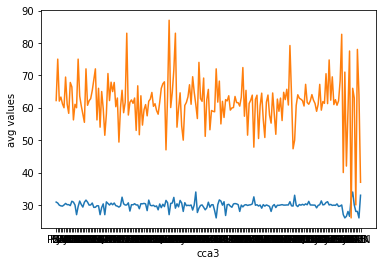

In [30]:
# Plot
plt.plot(df_pd_avg['cca3'], df_pd_avg['avg(temp)'])
plt.plot(df_pd_avg['cca3'], df_pd_avg['avg(humidity)'])

# Attributes
plt.ylabel('avg values')
plt.xlabel('cca3')
plt.show()

**Visualizing datasets**

Finally, the fun bit!

Data without visualization without a narrative arc, to infer insights or to see a trend, is useless. We always desire to make sense of the results.

By saving our Dataset, as a temporary table, I can issue complex SQL queries against it and visualize the results, using notebook's myriad plotting options.

In [31]:
# Create a table to execute SQL queries
df.createOrReplaceTempView('iot_device_data')

Count all devices for a partiular country and map them

In [32]:
%%sparksql
SELECT cca3, COUNT(DISTINCT device_id) AS device_id
FROM iot_device_data 
GROUP BY cca3 
ORDER BY device_id DESC 
LIMIT 100

only showing top 5 row(s)


Let's visualize the results as a pie chart and distribution for devices in the country where C02 are high.

In [33]:
query = \
'''
SELECT cca3, c02_level 
FROM iot_device_data 
WHERE c02_level > 1400 
ORDER BY c02_level DESC
'''

c02 = spark.sql(query)
print(type(c02))

<class 'pyspark.sql.dataframe.DataFrame'>


In [34]:
df_pd_c02 = c02.toPandas()
print(type(df_pd_c02))
df_pd_c02.columns

<class 'pandas.core.frame.DataFrame'>


Index(['cca3', 'c02_level'], dtype='object')

In [35]:
# plt.pie(df_pd_c02['c02_level'], labels=df_pd_c02['cca3']);

Select all countries' devices with high-levels of C02 and group by cca3 and order by device_ids

In [36]:
%%sparksql
SELECT cca3, COUNT(DISTINCT device_id) AS device_id
FROM iot_device_data
WHERE lcd == 'red'
GROUP BY cca3
ORDER BY device_id DESC
LIMIT 100

only showing top 5 row(s)


Find out all devices in countries whose batteries need replacements 

In [37]:
%%sparksql
SELECT cca3, COUNT(DISTINCT device_id) AS device_id
FROM iot_device_data
WHERE battery_level == 0
GROUP BY cca3 
ORDER BY device_id DESC
LIMIT 100

only showing top 5 row(s)


In [38]:
query = \
'''
SELECT cca3, COUNT(DISTINCT device_id) AS device_id
FROM iot_device_data
WHERE battery_level == 0
GROUP BY cca3 
ORDER BY device_id DESC
LIMIT 100
'''
test = spark.sql(query)
print(type(test))

<class 'pyspark.sql.dataframe.DataFrame'>


In [39]:
df_pd_test = test.toPandas()
print(type(df_pd_test))
df_pd_test.columns

<class 'pandas.core.frame.DataFrame'>


Index(['cca3', 'device_id'], dtype='object')

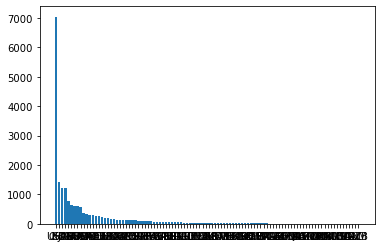

In [40]:
plt.bar(df_pd_test['cca3'], df_pd_test['device_id']);

Converting a Dataset to RDDs.

In [41]:
deviceEvents = df.select('device_name','cca3','c02_level')\
                .where(col('c02_level') > 1300)
print(type(deviceEvents))
deviceEvents

<class 'pyspark.sql.dataframe.DataFrame'>


+--------------------+----+---------+
|         device_name|cca3|c02_level|
+--------------------+----+---------+
|   sensor-pad-2n2Pea| NOR|     1473|
| device-mac-36TWSKiT| ITA|     1556|
|sensor-pad-8xUD6p...| JPN|     1536|
|sensor-pad-10Bsyw...| USA|     1470|
|meter-gauge-11dlM...| ITA|     1544|
+--------------------+----+---------+
only showing top 5 rows

In [42]:
myRdd = deviceEvents.rdd
print(type(myRdd))
myRdd

<class 'pyspark.rdd.RDD'>


MapPartitionsRDD[211] at javaToPython at NativeMethodAccessorImpl.java:0

# Question 2.1
*How many sensor pads are reported to be from Poland

In [43]:
# Display all column names
df.columns

['device_id',
 'device_name',
 'ip',
 'battery_level',
 'c02_level',
 'latitude',
 'longitude',
 'temp',
 'scale',
 'humidity',
 'cca2',
 'cca3',
 'cn',
 'lcd',
 'timestamp']

**Determine if the country Poland is always start with a capital P**

**(i) DF**

In [44]:
# Find all country starting with the letter P with case insensitive
df.filter(col('cn').rlike('(?i)^p')).select('cn').distinct().collect()

[Row(cn='Paraguay'),
 Row(cn='Philippines'),
 Row(cn='Peru'),
 Row(cn='Puerto Rico'),
 Row(cn='Panama'),
 Row(cn='Palestine'),
 Row(cn='Poland'),
 Row(cn='Portugal'),
 Row(cn='Papua New Guinea'),
 Row(cn='Pakistan')]

**(ii) SQL**

In [45]:
# Convert DF to a table IOT use SQL queries
df.createOrReplaceTempView('df_table')
type(df)

pyspark.sql.dataframe.DataFrame

In [46]:
df_table = spark.sql("SELECT*FROM df_table")
type(df_table)

pyspark.sql.dataframe.DataFrame

In [47]:
%%sparksql
SELECT DISTINCT cn AS Country
FROM df_table
WHERE cn REGEXP '(?i)^po'

**Note:** <br>
The country Poland always starts with an uppercase P

**Next, determine the number of devices that have 'sensor-pad' anywhere in the device_name**

In [48]:
# Total number of sensor-pad devices
count = df.filter(col('device_name').like('%sensor-pad%')).count()
print(f'There are a total of {count} devices with "sensor-pad" in the device_name.')

# Find devices with sensor-pad anywhere in the name
print('\nBelow are few examples with "sensor-pad" in the device_name:')
df.filter(col('device_name').like('%sensor-pad%')).select('device_name').show(3, truncate=False)

There are a total of 99082 devices with "sensor-pad" in the device_name.

Below are few examples with "sensor-pad" in the device_name:
+---------------------+
|device_name          |
+---------------------+
|sensor-pad-2n2Pea    |
|sensor-pad-4mzWkz    |
|sensor-pad-6al7RTAobR|
+---------------------+
only showing top 3 rows



In [49]:
# Number of devices from Poland and with sensor-pad in the name
count = df.filter((df.device_name.like('%sensor-pad%')) & (df.cn == 'Poland')).count()
print(f'There are a total of {count} devices that are from Poland with "sensor-pad" in the device_name.')

There are a total of 1413 devices that are from Poland with "sensor-pad" in the device_name.


# Question 2.2 
*How many different LCDs are present in the dataset

(i) Using df

In [50]:
# Determine number of unique LCD values
count = df.select(col('lcd')).distinct().count()

print(f'The are {count} different LCDs in the dataset.')
print('\nThe different LCD colours in the dataset are:')

# Display all unique LCD values
df.select(col('lcd')).distinct().show()

The are 3 different LCDs in the dataset.

The different LCD colours in the dataset are:
+------+
|   lcd|
+------+
| green|
|yellow|
|   red|
+------+



(ii) Using SQL

In [51]:
%%sparksql
SELECT DISTINCT lcd AS LCD_colours
FROM df_table

# Question 2.3
*Find 5 countries that have the largest number of MAC devices used 

In [52]:
# Total number of MAC devices
count = df.filter(col('device_name').like("%-MAC-%".lower())).count()
print(f'There are a total of {count} MAC devices in the dataset.')

# Find devices with MAC anywhere in the name
print('\nBelow are few examples with "-mac-" in the device_name:')
df.filter(df.device_name.like('%-MAC-%'.lower()))\
  .select('device_name')\
  .show(3, truncate=False)

There are a total of 33027 MAC devices in the dataset.

Below are few examples with "-mac-" in the device_name:
+-------------------+
|device_name        |
+-------------------+
|device-mac-36TWSKiT|
|device-mac-9GcjZ2pw|
|device-mac-15se6mZ |
+-------------------+
only showing top 3 rows



In [53]:
# Filter further by grouping by country and selecting top 5
df.filter(col('device_name') \
        .like('%-MAC-%'.lower())) \
        .select('device_name','cn') \
        .groupby('cn') \
        .count() \
        .withColumnRenamed('cn','country') \
        .withColumnRenamed('count','count_MAC') \
        .orderBy(col('count').desc()) \
        .limit(5) \
        .toPandas()

country  count_MAC
0      United States      11508
1              China       2300
2              Japan       2001
3  Republic of Korea       1999
4            Germany       1314

(ii) Using SQL

In [54]:
%%sparksql
SELECT cn AS Country, COUNT(cn) AS Count_MAC
FROM df_table
WHERE device_name REGEXP '(?i)-mac-'
GROUP BY cn
ORDER BY count(cn) DESC
LIMIT(5)

Observation:<br>
Using SQL was easier and less code in this particular case.

# Question 2.4 
*Propose and try an interesting statistical test or machine learning model you could use to gain insight from this dataset 

**Process**
- Step 1: start by performing basic pre-processing on the dataset
- Step 2: look at basic descriptive statistics and correlations among variables
- Step 3: build and evaluate a basic Classification model to predict the battery_level based on other features

## Step 1: Pre-processing

### Convert dtypes
No need to convert data types in the DF because I already did it in the schema earlier

### Missing values

In [55]:
# Check for missing values
df.select(*(sum((
                isnan(c) |  \
                col(c).isNull() | \
                col(c).contains('None') | \
                col(c).contains('NULL')  \
                # (col(c) == '') \
                ).cast('int')) \
                .alias(c) for c in df.columns)) \
                .toPandas()

device_id  device_name  ip  battery_level  c02_level  latitude  longitude  \
0          0            0   0              0          0         0          0   

   temp  scale  humidity  cca2  cca3  cn  lcd  timestamp  
0     0      0         0     0     0   0    0          0

**Observation:** <br>
No missing values in the dataset

### Define features

In [56]:
# Define features
all_var = df.drop('cca2','cca3','cn','device_id','device_name','ip','lcd','scale','timestamp')
features = all_var.drop('battery_level')

print('All variables names:', all_var.columns)
print('All feature names', features.columns)
type(features)

All variables names: ['battery_level', 'c02_level', 'latitude', 'longitude', 'temp', 'humidity']
All feature names ['c02_level', 'latitude', 'longitude', 'temp', 'humidity']


pyspark.sql.dataframe.DataFrame

## Step 2a: Descriptive Stats

In [57]:
# Descriptive statistics
all_var.describe().toPandas().transpose()

0                    1                   2       3       4
summary         count                 mean              stddev     min     max
battery_level  198164   4.4997678690377665  2.8733916884106026     0.0     9.0
c02_level      198164   1199.7639429967098   231.0600256290075     800    1599
latitude       198164    36.52115606265366  17.907740712889428  -51.75    72.0
longitude      198164  -0.6459595082859625   88.72758217920097  -175.0  178.42
temp           198164   22.012787388223895  7.2098482538871265    10.0    34.0
humidity       198164    61.99212773258513  21.672313062313957      25      99

## Step 2b: Correlations

In [58]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
import seaborn as sns

# Define function
def correlation_matrix(df, corr_columns, method='spearman'):

    #Combine features for correlation to a single DenseVector
    vector_col = 'corr_features'
    assembler = VectorAssembler(inputCols=corr_columns, outputCol=vector_col)
    df_vector = assembler.transform(df).select(vector_col)
    
    # Compute correlation
    matrix = Correlation.corr(df_vector, vector_col, method)

    # Change matrix format
    result = matrix.collect()[0]['spearman({})'.format(vector_col)].values
    matrix_np = result.reshape(len(corr_columns),len(corr_columns))

    # Plot heatmap
    fig, ax = plt.subplots(figsize=(10,6))
    ax = sns.heatmap(matrix_np, annot=True, cmap='YlGnBu')
    ax.xaxis.set_ticklabels(corr_columns, rotation=270)
    ax.yaxis.set_ticklabels(corr_columns, rotation=0)
    ax.set_title('Correlation Matrix');
    
    # Return DF
    return pd.DataFrame(result.reshape(-1, len(corr_columns)), columns=corr_columns, index=corr_columns)

22/03/06 23:15:56 WARN Executor: Managed memory leak detected; size = 38033562 bytes, task 0.0 in stage 119.0 (TID 120)
22/03/06 23:15:59 WARN Executor: Managed memory leak detected; size = 38033562 bytes, task 0.0 in stage 125.0 (TID 123)
22/03/06 23:16:00 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
22/03/06 23:16:00 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS
/home/sylvie/anaconda3/envs/BigData/lib/python3.8/site-packages/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


battery_level  c02_level  latitude  longitude      temp  \
battery_level       1.000000  -0.000571  0.000396   0.000636 -0.002813   
c02_level          -0.000571   1.000000  0.000470  -0.004092  0.002710   
latitude            0.000396   0.000470  1.000000  -0.126935 -0.000284   
longitude           0.000636  -0.004092 -0.126935   1.000000  0.002551   
temp               -0.002813   0.002710 -0.000284   0.002551  1.000000   
humidity            0.002305   0.003216  0.001222  -0.000685 -0.001006   

               humidity  
battery_level  0.002305  
c02_level      0.003216  
latitude       0.001222  
longitude     -0.000685  
temp          -0.001006  
humidity       1.000000

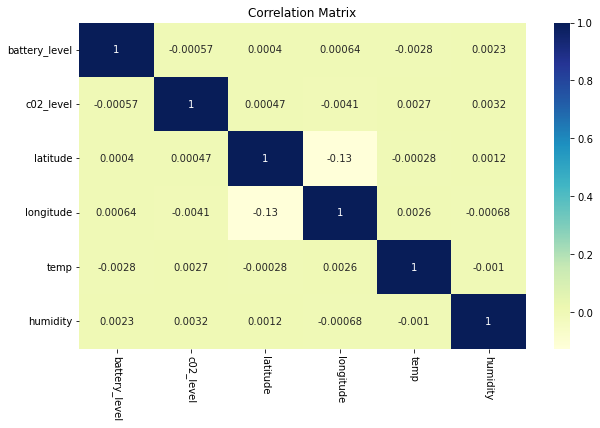

In [59]:
# Call function
corr_columns = all_var.columns
correlation_matrix(df, corr_columns)

**Observation:** <br>
There is no correlation among all variables except a weak correlation between latitude and longitude.<br>
This is already telling us that we may not be able to build any good predictive model because the features don't seem to be related to 'battery_level'.

## Step 3: Classification Model

I know we determined in Step 2 that the features are not good predictors but we'll build a classification model anyway to go though the motion of using MLlib.

In [60]:
from pyspark.ml.linalg import Vectors 
from pyspark.ml.feature import VectorAssembler, StandardScaler, StringIndexer, OneHotEncoder
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml import Pipeline
from time import time

### a) Features prep

In [61]:
# Note: I ran this cell to encode the country variable for modeling. Please see note below.
'''
# One Hot Encoder for country initials (cca2) which is not an ordinal categorial feature
cat_features= ['cca2']

# Step 1: Index
indexer = StringIndexer(inputCols=cat_features, outputCols=[x + 'Index' for x in cat_features])
# Step 2: Encode
encoder = OneHotEncoder(inputCols=indexer.getOutputCols(), outputCols=[x + "OHE" for x in cat_features])
# Step 3: join in a pipeline
pipeline = Pipeline(stages= [indexer, encoder])
# Step 4: transform pipeline
all_var_ohe = pipeline.fit(all_var).transform(all_var)

# Display results
all_var_ohe
'''

'\n# One Hot Encoder for country initials (cca2) which is not an ordinal categorial feature\ncat_features= [\'cca2\']\n\n# Step 1: Index\nindexer = StringIndexer(inputCols=cat_features, outputCols=[x + \'Index\' for x in cat_features])\n# Step 2: Encode\nencoder = OneHotEncoder(inputCols=indexer.getOutputCols(), outputCols=[x + "OHE" for x in cat_features])\n# Step 3: join in a pipeline\npipeline = Pipeline(stages= [indexer, encoder])\n# Step 4: transform pipeline\nall_var_ohe = pipeline.fit(all_var).transform(all_var)\n\n# Display results\nall_var_ohe\n'

**Important Note:** <br>
The model performed significantly worst with the country (cca2) as a feature. So I decided to perform modeling without this feature. 

In [62]:
# Drop target variable
featureCols = all_var.drop('battery_level')

print(featureCols.columns)
type(featureCols)

['c02_level', 'latitude', 'longitude', 'temp', 'humidity']


pyspark.sql.dataframe.DataFrame

**(i) Assembler**

In [63]:
# Combine all features to a single DenseVector Column named 'features'
assembler = VectorAssembler()\
              .setInputCols(featureCols.columns)\
              .setOutputCol('features')

df_vector = assembler.transform(all_var)

type(df_vector) # not transformed yet

pyspark.sql.dataframe.DataFrame

In [64]:
# Select only target and vectorized features columns
data = df_vector.select('features','battery_level')

print('Total number of rows in the "data" DF:', data.count())

# Display DF
data.toPandas()

Total number of rows in the "data" DF: 198164


features  battery_level
0           [868.0, 38.0, -97.0, 34.0, 51.0]            8.0
1          [1473.0, 62.47, 6.15, 11.0, 70.0]            7.0
2         [1556.0, 42.83, 12.83, 19.0, 44.0]            2.0
3       [1080.0, 44.06, -121.32, 28.0, 32.0]            6.0
4         [931.0, 14.58, 120.97, 25.0, 62.0]            4.0
...                                      ...            ...
198159    [1594.0, 42.83, 12.83, 24.0, 49.0]            5.0
198160    [1051.0, 45.5, -73.55, 27.0, 63.0]            4.0
198161     [1455.0, 52.37, 4.89, 17.0, 51.0]            3.0
198162    [1358.0, 48.19, 11.38, 30.0, 56.0]            4.0
198163    [1291.0, 53.08, 18.62, 12.0, 98.0]            0.0

[198164 rows x 2 columns]

**(ii) Scaling**

In [65]:
# Scaling features
scaler = StandardScaler().setInputCol('features').setOutputCol('features_scaled')

# Normalize features
features_scaled = scaler.fit(data).transform(data)

In [66]:
# Create DF ready for ML
data_scaled = features_scaled.select('features_scaled','battery_level')
data_scaled.toPandas()

features_scaled  battery_level
0       [3.756599600632219, 2.12198739133233, -1.09323...            8.0
1       [6.374966833791773, 3.488435587803438, 0.06931...            7.0
2       [6.734180850902918, 2.39170315712536, 0.144599...            2.0
3       [4.674110102169121, 2.4603885384763804, -1.367...            6.0
4       [4.0292560232587515, 0.8141730569901413, 1.363...            4.0
...                                                   ...            ...
198159  [6.898640280423684, 2.39170315712536, 0.144599...            5.0
198160  [4.548601590166432, 2.5408006922531845, -0.828...            4.0
198161  [6.297064998755621, 2.924433675896687, 0.05511...            3.0
198162  [5.877260665505246, 2.6910150628501306, 0.1282...            4.0
198163  [5.5872927239817916, 2.964081335050528, 0.2098...            0.0

[198164 rows x 2 columns]

**(iii) Split**

In [67]:
# Split scaled data
train, test = data_scaled.randomSplit([0.7,0.3], seed=0)

# Going to cache the data to make sure things stay snappy!
train.cache()
test.cache()

print('Number of rows for train_scaled:', train.count())
print('Number of rows for test_scaled:', test.count())

Number of rows for train_scaled: 138509


Number of rows for test_scaled: 59655


In [68]:
# Check initial data distributions
print('Distribution of data in full dataset:')
data_scaled.groupby('battery_level').count().orderBy('battery_level').collect()

Distribution of data in full dataset:


[Row(battery_level=0.0, count=19851),
 Row(battery_level=1.0, count=19876),
 Row(battery_level=2.0, count=19774),
 Row(battery_level=3.0, count=19766),
 Row(battery_level=4.0, count=19764),
 Row(battery_level=5.0, count=19843),
 Row(battery_level=6.0, count=19753),
 Row(battery_level=7.0, count=19915),
 Row(battery_level=8.0, count=19822),
 Row(battery_level=9.0, count=19800)]

In [69]:
# Data distribution - train dataset      
print('Distribution of data in train dataset is:')
train.groupby('battery_level').count().orderBy('battery_level').collect()

Distribution of data in train dataset is:


[Row(battery_level=0.0, count=13911),
 Row(battery_level=1.0, count=13940),
 Row(battery_level=2.0, count=13868),
 Row(battery_level=3.0, count=13757),
 Row(battery_level=4.0, count=13844),
 Row(battery_level=5.0, count=13845),
 Row(battery_level=6.0, count=13830),
 Row(battery_level=7.0, count=13948),
 Row(battery_level=8.0, count=13784),
 Row(battery_level=9.0, count=13782)]

In [70]:
# Data distribution - test dataset    
print('Distribution of data in test dataset is:')
test.groupby('battery_level').count().orderBy('battery_level').collect()

Distribution of data in test dataset is:


[Row(battery_level=0.0, count=5940),
 Row(battery_level=1.0, count=5936),
 Row(battery_level=2.0, count=5906),
 Row(battery_level=3.0, count=6009),
 Row(battery_level=4.0, count=5920),
 Row(battery_level=5.0, count=5998),
 Row(battery_level=6.0, count=5923),
 Row(battery_level=7.0, count=5967),
 Row(battery_level=8.0, count=6038),
 Row(battery_level=9.0, count=6018)]

**Observation:** <br>
We have a balanced dataset among classification categories for the train and test sets. <br>
<br>
Next, let's build a basic logistic regression model using the default hyperparameters.

### b) Logistic Regression

#### Modeling

In [71]:
t0 = time()

# Define input
target = 'battery_level'
features = 'features_scaled'
maxIter = 10
thres = 0.5

# Define algorithm
algo = LogisticRegression()

# Define model
model = (algo.setLabelCol(target)
             .setFeaturesCol(features) 
             .setMaxIter(maxIter)
             .setElasticNetParam(thres)
        )
logReg = model.fit(train)

#--------------------------------------------------------------------
# Processing time
delta = time() - t0
print('Classifier Train Time : %d sec' % delta) # 5 min

Classifier Train Time : 276 sec


#### Performance Metrics

**(i) Basic performance metrics built-in Logistic Regression**

In [72]:
t0 = time()

model = logReg

# Print the coefficients and intercept for multinomial logistic regression
print('Coefficients: \n' + str(model.coefficientMatrix))
# print('Intercept: \n' + str(model.interceptVector))


# Evaluation Summary - training set
trainSummary = model.summary

#---------- Accuracy
print(F'\nModel Accuracy (train): {trainSummary.accuracy*100}%')
#---------- Precision
print('\nPrecision (train) by label:')
for i, prec in enumerate(trainSummary.precisionByLabel):
    print('label %d: %s' % (i, prec))
#---------- Others
falsePositiveRate = trainSummary.weightedFalsePositiveRate
truePositiveRate = trainSummary.weightedTruePositiveRate
fMeasure = trainSummary.weightedFMeasure()
precision = trainSummary.weightedPrecision
recall = trainSummary.weightedRecall

print('''
FPR (weighted): \t%f
TPR (weighted): \t%s
F1 score (weighted): \t%s
Precision (weighted): \t%s
Recall (weighted): \t%s'''
% (falsePositiveRate, truePositiveRate, fMeasure, precision, recall))

#--------------------------------------------------------------------
# Processing time
delta = time() - t0
print('\nEvaluation Time : %d sec' % delta)

Coefficients: 
DenseMatrix([[ 0.00109131, -0.01837997, -0.00353198,  0.00521517,  0.00244397],
             [ 0.01029953,  0.00306047, -0.00557343, -0.00284142, -0.00528365],
             [-0.00686363, -0.00366433,  0.00013206, -0.00282432, -0.00449066],
             [-0.01021928, -0.00775088, -0.0069024 ,  0.01165042,  0.00045169],
             [-0.00481762,  0.01244383,  0.00247028,  0.00296863,  0.00303359],
             [-0.00046391,  0.004312  ,  0.01398624,  0.00767838,  0.00173114],
             [ 0.007563  ,  0.00825013,  0.00159672, -0.01748189, -0.00578037],
             [ 0.00320793,  0.0110133 , -0.00973827, -0.01280225, -0.0024835 ],
             [ 0.00115236, -0.00603414,  0.00149352,  0.01700424,  0.0032962 ],
             [-0.00094968, -0.00325041,  0.00606726, -0.00856696,  0.00708158]])



Model Accuracy (train): 10.246265585629814%

Precision (train) by label:
label 0: 0.10310715708405259
label 1: 0.10156160293948789
label 2: 0.09179616913624865
label 3: 0.1047808764940239
label 4: 0.1016745212072596
label 5: 0.10205075746504944
label 6: 0.1024319681764759
label 7: 0.10358556181796379
label 8: 0.10190444370197127
label 9: 0.09879336349924585

FPR (weighted): 	0.099987
TPR (weighted): 	0.10246265585629816
F1 score (weighted): 	0.0899236197643149
Precision (weighted): 	0.1011683972249573
Recall (weighted): 	0.10246265585629816

Evaluation Time : 23 sec


**(ii) Predictions**

In [73]:
# Compute predictions on test set
pred_test_logR = model.transform(test)

# Display predictions
display(pred_test_logR.select(target,'prediction'))

+-------------+----------+
|battery_level|prediction|
+-------------+----------+
|          1.0|       0.0|
|          1.0|       0.0|
|          4.0|       9.0|
|          7.0|       5.0|
|          7.0|       2.0|
+-------------+----------+
only showing top 5 rows

**(iii) Classification Evaluator**

In [74]:
# Define metric
metric = 'accuracy'

# Define evaluator
evaluator = MulticlassClassificationEvaluator()\
                    .setLabelCol(target)\
                    .setPredictionCol('prediction')\
                    .setMetricName(metric)

# Activate evaluator
accuracy = evaluator.evaluate(pred_test_logR)

#---------------------------------------------------------------------------------------------------
# Print performance metrics
print(f'Model Accuracy (test) for Logistic Regression = {accuracy*100}%')

Model Accuracy (test) for Logistic Regression = 10.049451009974018%


**Observation:**<br>
We mentioned at the beginning that the model would not be good but an accuracy of 10% is quite remarkable in a negative way! Let's try building a Random Forest Classifier to see if we can get better results. However, with such a low accuracy, I don't forsee a large improvement.

### C) RF Classifier

#### Modeling

In [75]:
t0 = time()

# Define input
target = 'battery_level'
features = 'features_scaled'

# Define algorithm
algo = RandomForestClassifier()

# Define model
model = (algo.setMaxDepth(10) 
             .setNumTrees(20) 
             .setLabelCol(target) 
             .setFeaturesCol(features))

rfc = model.fit(train)  

#--------------------------------------------------------------------
# Processing time
delta = time() - t0
print('Classifier Train Time : %d sec' % delta) # 14 sec

22/03/06 23:21:41 WARN DAGScheduler: Broadcasting large task binary with size 1119.1 KiB
22/03/06 23:21:43 WARN DAGScheduler: Broadcasting large task binary with size 1989.5 KiB
22/03/06 23:21:45 WARN DAGScheduler: Broadcasting large task binary with size 3.4 MiB


Classifier Train Time : 14 sec


#### Performance Metrics

**(i) Predictions**

In [76]:
# Define model
model = rfc

# Make predictions
pred_rfc_test = model.transform(test)

# Display predictions
display(pred_rfc_test.select('battery_level','prediction'))

22/03/06 23:21:48 WARN DAGScheduler: Broadcasting large task binary with size 3.3 MiB
22/03/06 23:21:48 WARN DAGScheduler: Broadcasting large task binary with size 3.3 MiB


+-------------+----------+
|battery_level|prediction|
+-------------+----------+
|          1.0|       9.0|
|          1.0|       4.0|
|          4.0|       3.0|
|          7.0|       4.0|
|          7.0|       3.0|
+-------------+----------+
only showing top 5 rows

**(ii) Classification Evaluator**

In [77]:
# Define metric
metric = 'accuracy'

# Define evaluator
evaluator = MulticlassClassificationEvaluator()\
                    .setLabelCol(target)\
                    .setPredictionCol('prediction')\
                    .setMetricName(metric)

# Activate evaluator
accuracy_rfc = evaluator.evaluate(pred_rfc_test)


# Print performance metrics
print(f'Model Accuracy (test) for RF Classifier = {accuracy_rfc*100}%')

22/03/06 23:21:49 WARN DAGScheduler: Broadcasting large task binary with size 3.3 MiB


Model Accuracy (test) for RF Classifier = 10.051127315396865%


**(iii) Confusion Matrix**

In [78]:
# Check types
type(pred_rfc_test)

pyspark.sql.dataframe.DataFrame

**Note:**<br>
Confusion Matrix is only available with MLlib using RDD. <br>
So we need to convert DF --> RDD first

In [79]:
# Convert SQL DF to RDD ensuring prediction and target are floats
predictionAndLabels = pred_rfc_test.select('battery_level','prediction')\
                                   .rdd.map(lambda xs: [float(x) for x in xs])

# Verify it got converted correctly to RDD
print(type(predictionAndLabels))

# Display few examples to ensure they are floats
predictionAndLabels.take(5)

<class 'pyspark.rdd.PipelinedRDD'>


22/03/06 23:21:50 WARN DAGScheduler: Broadcasting large task binary with size 3.3 MiB
22/03/06 23:21:51 WARN BlockManager: Task 237 already completed, not releasing lock for rdd_369_0


[[1.0, 9.0], [1.0, 4.0], [4.0, 3.0], [7.0, 4.0], [7.0, 3.0]]

In [80]:
from pyspark.mllib.evaluation import MulticlassMetrics

# Instantiate metrics 
metrics = MulticlassMetrics(predictionAndLabels)

# Create Confusion Matrix
matrix_array = metrics.confusionMatrix().toArray()

# Convert matrix array to DF
matrix_df = pd.DataFrame(matrix_array)

/home/sylvie/anaconda3/envs/BigData/lib/python3.8/site-packages/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(
22/03/06 23:21:51 WARN DAGScheduler: Broadcasting large task binary with size 3.3 MiB
22/03/06 23:21:51 WARN BlockManager: Task 238 already completed, not releasing lock for rdd_369_0
22/03/06 23:21:51 WARN DAGScheduler: Broadcasting large task binary with size 3.3 MiB


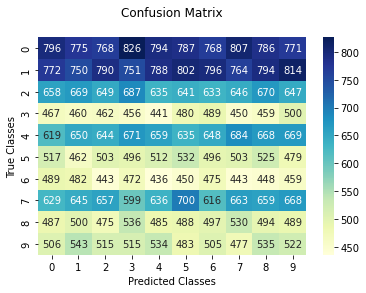

In [81]:
# Plot Confusion Matrix
sns.heatmap(matrix_df, annot=True, fmt='g', cmap='YlGnBu')

# Settings
plt.title('Confusion Matrix\n')
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes');

**(iv) Classification Report**

In [82]:
import sklearn 
from sklearn.metrics import classification_report

# Predictions on train set
pred_train = model.transform(train)

y_true = pred_train.select(['battery_level']).collect()
y_pred = pred_train.select(['prediction']).collect()

# Display Classification Report
print('\n\t>>> Classification Report on training set<<<\n')
print(classification_report(y_true, y_pred))

22/03/06 23:21:55 WARN DAGScheduler: Broadcasting large task binary with size 3.3 MiB



	>>> Classification Report on training set<<<

              precision    recall  f1-score   support

         0.0       0.19      0.24      0.21     13911
         1.0       0.19      0.25      0.22     13940
         2.0       0.20      0.22      0.21     13868
         3.0       0.23      0.18      0.20     13757
         4.0       0.20      0.22      0.21     13844
         5.0       0.22      0.18      0.20     13845
         6.0       0.23      0.18      0.20     13830
         7.0       0.21      0.22      0.21     13948
         8.0       0.22      0.18      0.20     13784
         9.0       0.22      0.19      0.21     13782

    accuracy                           0.21    138509
   macro avg       0.21      0.21      0.21    138509
weighted avg       0.21      0.21      0.21    138509



In [83]:
# Predictions on test set
pred_test = model.transform(test)

y_true = pred_test.select(['battery_level']).collect()
y_pred = pred_test.select(['prediction']).collect()

# Display Classification Report
print('\n\t>>> Classification Report on test set<<<\n')
print(classification_report(y_true, y_pred))

22/03/06 23:22:01 WARN DAGScheduler: Broadcasting large task binary with size 3.3 MiB



	>>> Classification Report on test set<<<

              precision    recall  f1-score   support

         0.0       0.10      0.13      0.12      5940
         1.0       0.10      0.13      0.11      5936
         2.0       0.10      0.11      0.10      5906
         3.0       0.10      0.08      0.09      6009
         4.0       0.10      0.11      0.11      5920
         5.0       0.11      0.09      0.10      5998
         6.0       0.10      0.08      0.09      5923
         7.0       0.10      0.11      0.11      5967
         8.0       0.10      0.08      0.09      6038
         9.0       0.10      0.09      0.09      6018

    accuracy                           0.10     59655
   macro avg       0.10      0.10      0.10     59655
weighted avg       0.10      0.10      0.10     59655



**Final Observations:**<br>
Where to start? Both classification models are really bad. An overall model accuracy of 21% on the training set and 10% on the test set show how much the features have absolutely no predictive power. No tuning was performed but with such a bad model, there is no need to go further. RandomForestClassifier was not better than LogisticRegression to predict the target variable 'Battery Level'. According to the confusion matrix, it seems like the model performs 'better' to predict battely_level 0 & 7 and as a result show a better recall. <br>
<br>
**Conclusion:**<br>
I thought that we could predict to a certain extent battery_level based on temperature and gain better insights into the dataset, but no 'Battery Level' cannot be predicted accurately based on variables included in the dataset. 

In [5]:
# Close session
sc.stop()